#### Import de algoritmos e suas classes

In [1]:
from Busca_Binaria_Recursao import binary_search_recursion
from Busca_Binaria_Iteracao import binary_search_iteration
from Busca_Linear_Ordenada import ordered_sequential_search

#### Imports gerais

In [2]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd

#### Importando um arquivo txt com as palavras da lingua portuguesa

In [3]:
file = open("palavras-br-sem-acentos.txt", "r")
words = file.read().splitlines()
#print(words)
file.close()
print(f"Tamanho do array: {len(words)}")

Tamanho do array: 245366


#### Selecionando uma palavra aleatoriamente

In [4]:
wordSearch = words[random.randint(0, len(words))]
print(wordSearch)

erradicamo


#### Busca Binária Recursiva da palavra aleatória + Medição de tempo de busca

In [5]:
begin = time.time()
binary_search_recursion(words, 0, len(words) - 1, wordSearch)
end = time.time()
timeBinarySearchRecursion = (end - begin)
print(timeBinarySearchRecursion)

3.814697265625e-05


#### Busca Binária Iteração da palavra aleatória + Medição de tempo de busca

In [6]:
begin = time.time()
binary_search_iteration(words, wordSearch)
end = time.time()
timeBinarySearchInteration = (end - begin)
print(timeBinarySearchInteration)

5.507469177246094e-05


#### Busca Linear da palavra aleatória + Medição de tempo de busca

In [7]:
begin = time.time()
ordered_sequential_search(words, wordSearch)
end = time.time()
timeLinearSearch = (end - begin)
print(timeLinearSearch)

0.009514093399047852


### Comparação de Tempos de Pesquisa de palavra aleatória no dicionário de palavras

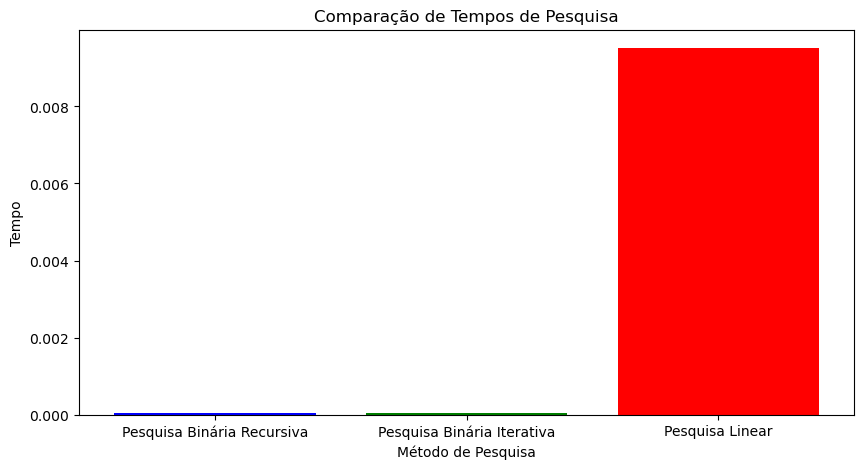

In [8]:
vars = ['Pesquisa Binária Recursiva', 'Pesquisa Binária Iterativa', 'Pesquisa Linear']
times = [timeBinarySearchRecursion, timeBinarySearchInteration, timeLinearSearch]

plt.figure(figsize=(10, 5)) 

plt.bar(vars, times, color=['blue', 'green', 'red'])
plt.xlabel('Método de Pesquisa')
plt.ylabel('Tempo')
plt.title('Comparação de Tempos de Pesquisa')
plt.show()

#### Criando 10 cenários de pesquisa com arrays de diferentes tamanhos para comparação de tempo de execução

###### Criamos arrays com valores aletórios entre 1 e 1.000.000 e já ordemos.
###### Os arrays tem os seguintes tamanhos: 10, 100, 500, 1000, 10000, 50000, 100000, 200000, 500000, 1000000

In [9]:
arraySizes = [10, 100, 500, 1000, 10000, 50000, 100000, 500000, 1000000, 10000000]

timesBinarySearchRecursive = []
timesBinarySearchInteractive = []
timesLinearSearch = []


for size in arraySizes:
    array = sorted([random.randint(1, 1000000) for _ in range(size)])
    #selecionando um número aleatório para pesquisa no Array gerado
    search = array[random.randint(0, size - 1)]
    
    #Pesquisando - Busca Binária Recursiva
    begin = time.time()
    binary_search_recursion(array, 0, size - 1, search)
    end = time.time()
    timeBinarySearchRecursion = (end - begin)
    
    timesBinarySearchRecursive.append(timeBinarySearchRecursion)

    #Pesquisando - Busca Binária Iterativa
    begin = time.time()
    binary_search_iteration(array, search)
    end = time.time()
    timeBinarySearchInteration = (end - begin)
    
    timesBinarySearchInteractive.append(timeBinarySearchInteration)

    #Pesquisando - Busca Linear
    begin = time.time()
    ordered_sequential_search(array, search)
    end = time.time()
    timeLinearSearch = (end - begin)

    timesLinearSearch.append(timeLinearSearch)


### Gráfico de tempo de execução para cada uma das técnicas nos 10 cenários diferentes apresentados.

###### O tempo aqui apresentado se trata do tempo medido para executar o algoritmo e não a ordem a que o algoritmo é.

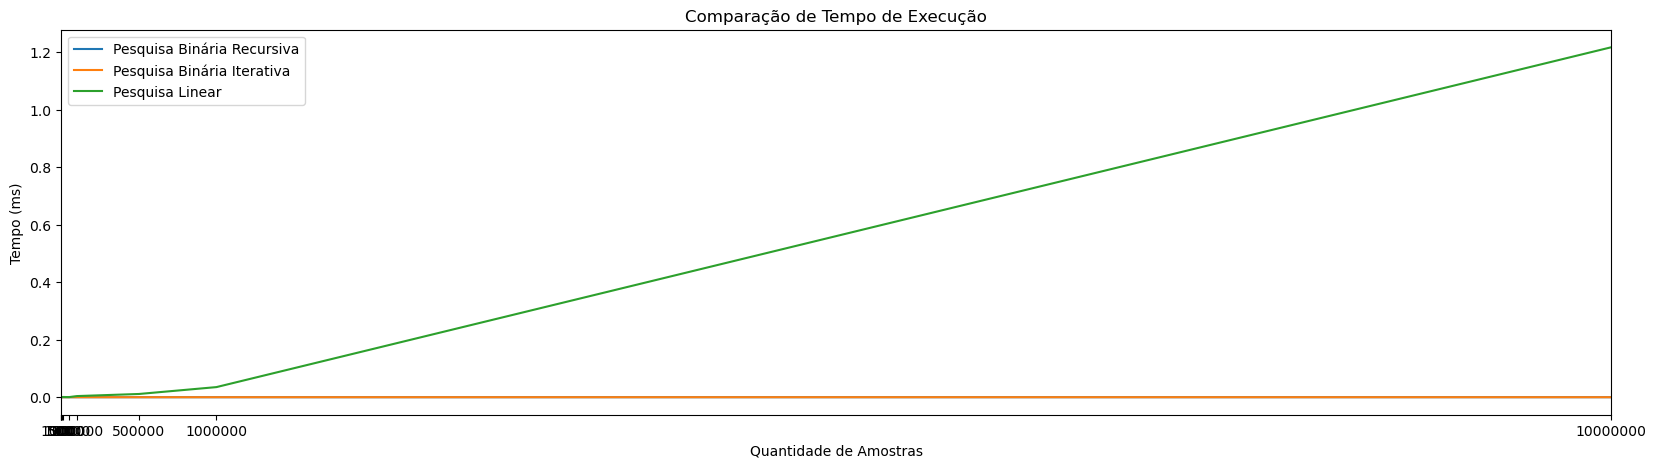

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(arraySizes, timesBinarySearchRecursive, label='Pesquisa Binária Recursiva')
ax.plot(arraySizes, timesBinarySearchInteractive, label='Pesquisa Binária Iterativa')
ax.plot(arraySizes, timesLinearSearch, label='Pesquisa Linear')

ax.set_xlabel('Quantidade de Amostras')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Comparação de Tempo de Execução')

ax.legend()

plt.xticks(arraySizes, [str(s) for s in arraySizes])

ax.set_xlim(arraySizes[0], arraySizes[-1])

plt.show()

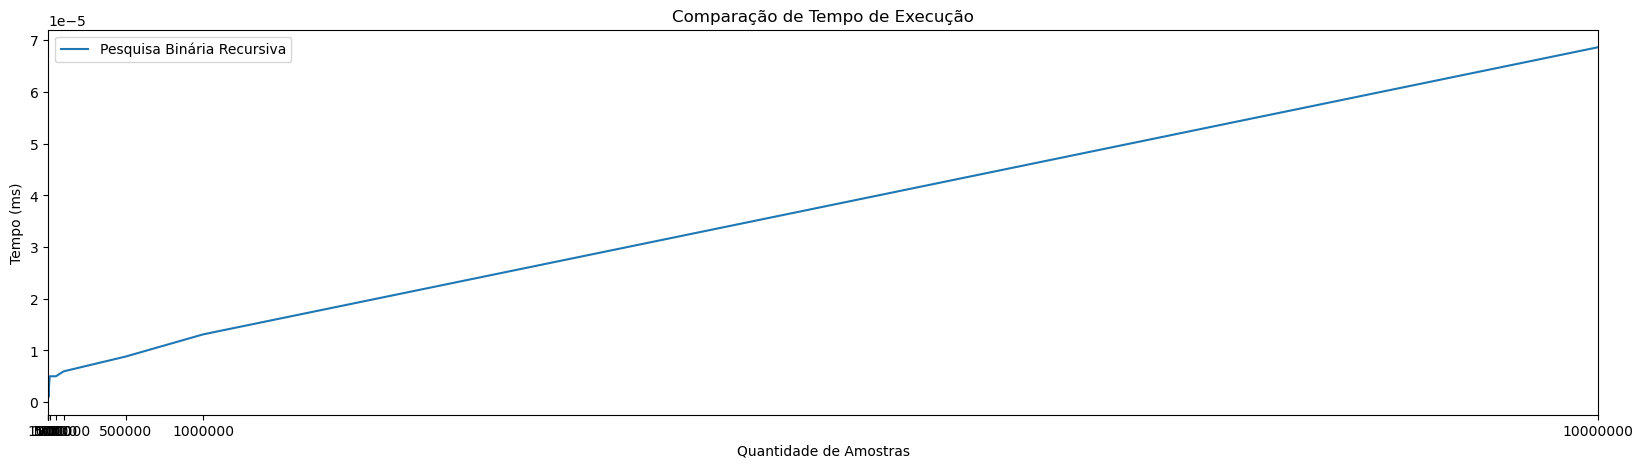

In [11]:
# Tempo de execução da Busca Binária Recursiva

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(arraySizes, timesBinarySearchRecursive, label='Pesquisa Binária Recursiva')

ax.set_xlabel('Quantidade de Amostras')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Comparação de Tempo de Execução')

ax.legend()

plt.xticks(arraySizes, [str(s) for s in arraySizes])

ax.set_xlim(arraySizes[0], arraySizes[-1])

plt.show()

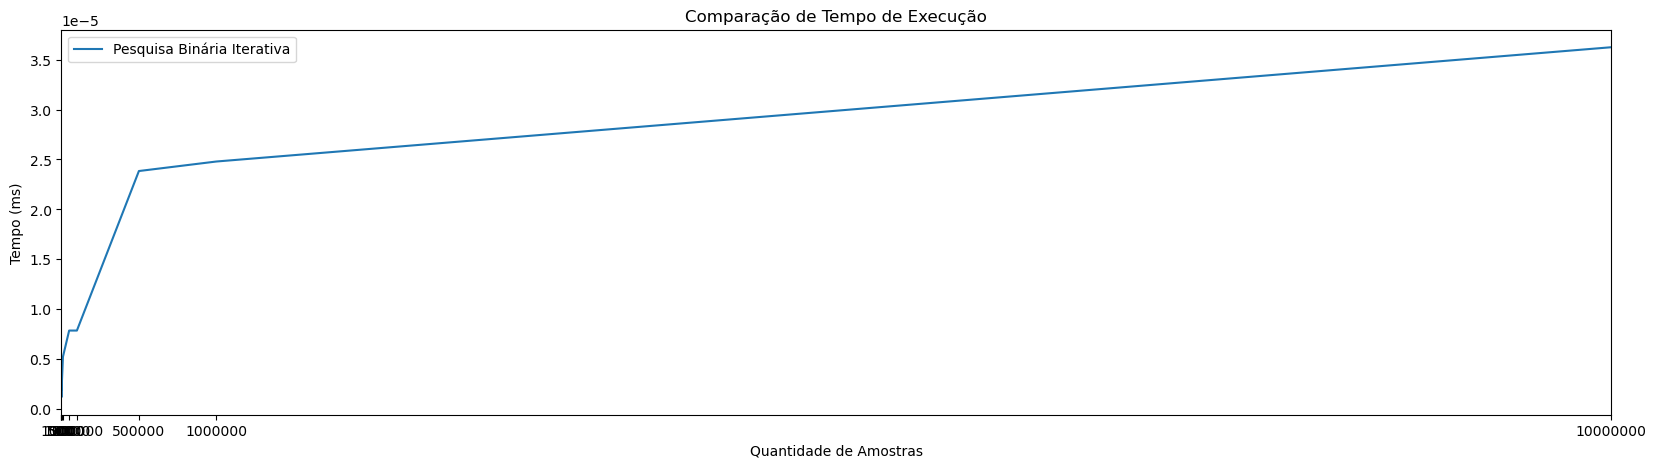

In [12]:
# Tempo de execução da Busca Binária Iterativa

fig, ax = plt.subplots(figsize=(20, 5))  # Define o tamanho da figura

ax.plot(arraySizes, timesBinarySearchInteractive, label='Pesquisa Binária Iterativa')

ax.set_xlabel('Quantidade de Amostras')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Comparação de Tempo de Execução')

ax.legend()

plt.xticks(arraySizes, [str(s) for s in arraySizes])

ax.set_xlim(arraySizes[0], arraySizes[-1])

plt.show()

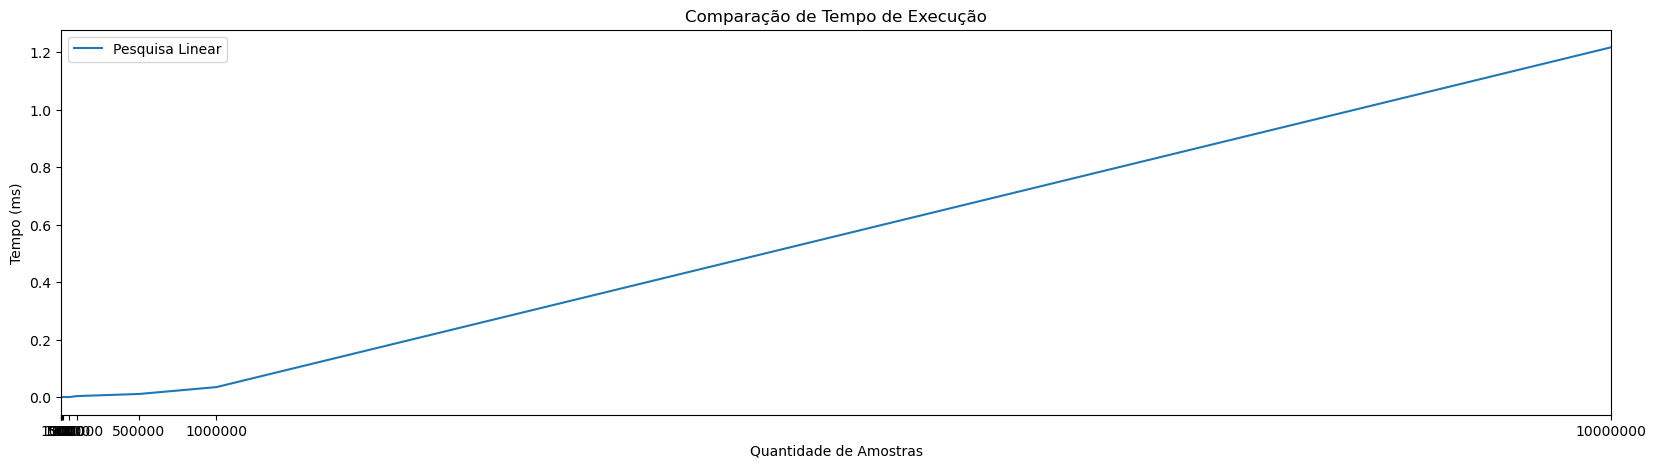

In [13]:
# Tempo de execução da Busca Linear

fig, ax = plt.subplots(figsize=(20, 5))  # Define o tamanho da figura

ax.plot(arraySizes, timesLinearSearch, label='Pesquisa Linear')

ax.set_xlabel('Quantidade de Amostras')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Comparação de Tempo de Execução')

ax.legend()

plt.xticks(arraySizes, [str(s) for s in arraySizes])

ax.set_xlim(arraySizes[0], arraySizes[-1])

plt.show()

In [14]:
df = pd.DataFrame({
    'Qtde Amostras': arraySizes,
    'Pesq. Binária Recursiva': timesBinarySearchRecursive,
    'Pesq. Binária Iterativa': timesBinarySearchInteractive,
    'Pesq. Linear': timesLinearSearch
})

# Transpondo o DataFrame para ter os tempos como linhas
df = df.set_index('Qtde Amostras').T

pd.set_option('display.max_colwidth', None)

# Exibindo a tabela
print(df)

Qtde Amostras            10            100       500           1000      \
Pesq. Binária Recursiva  0.000002  9.536743e-07  0.000003  9.536743e-07   
Pesq. Binária Iterativa  0.000002  1.192093e-06  0.000003  1.907349e-06   
Pesq. Linear             0.000002  2.789497e-05  0.000033  7.128716e-05   

Qtde Amostras            10000     50000     100000    500000    1000000   \
Pesq. Binária Recursiva  0.000005  0.000005  0.000006  0.000009  0.000013   
Pesq. Binária Iterativa  0.000005  0.000008  0.000008  0.000024  0.000025   
Pesq. Linear             0.000759  0.000473  0.003979  0.011272  0.035193   

Qtde Amostras            10000000  
Pesq. Binária Recursiva  0.000069  
Pesq. Binária Iterativa  0.000036  
Pesq. Linear             1.217498  
